---
---

## 3. Prediction (Multi-class Classification)

In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``SVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report
 - ROC/AUC Curve

### Import Libraries

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, classification_report,ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.tree import plot_tree
from yellowbrick.classifier import ClassPredictionError, ROCAUC

### Data Preprocessing

In [22]:
X=data.drop("class", axis=1)
y= data["class"]

In [23]:
X_train, X_test, y_train, y_test= train_test_split (X,y,test_size=0.25, shuffle=False)

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [24]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [26]:
eval_metric(dt_model, X_train, y_train, X_test, y_test)     #overfitting

Test_Set
[[271   1   0   0   0   0   0   0   0   0]
 [  0 261  26   2   1   1   0   0   1   0]
 [  0   6 281   1   0   0   4   2   0   0]
 [  0   7   4 264   0   1   0   0   1   1]
 [  0   0   0   2 286   1   1   0   0   0]
 [  0   0   0   7   3 245   0   2   2   8]
 [  8   5   1   0   0   0 244   1   3   2]
 [  2   6   3   4   0   5   2 246   1   0]
 [  6   0   0   0   0   1   1   1 247   0]
 [  0   2   0   3   1   4   0   5   1 250]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       272
           1       0.91      0.89      0.90       292
           2       0.89      0.96      0.92       294
           3       0.93      0.95      0.94       278
           4       0.98      0.99      0.98       290
           5       0.95      0.92      0.93       267
           6       0.97      0.92      0.95       264
           7       0.96      0.91      0.94       269
           8       0.96      0.96      0.96       256
           9       

In [27]:
scores=cross_validate(dt_model, X_train, y_train, 
                      scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                      return_train_score=True,
                      cv=5,
                      n_jobs=-1)
pd.DataFrame(scores)


fit_time  score_time  test_accuracy  train_accuracy  test_precision_macro  \
0  0.030915    0.003240       0.957550             1.0              0.957331   
1  0.031668    0.003227       0.962401             1.0              0.962606   
2  0.031346    0.003295       0.961189             1.0              0.961297   
3  0.030367    0.003571       0.958156             1.0              0.958572   
4  0.031144    0.003794       0.941141             1.0              0.942145   

   train_precision_macro  test_recall_macro  train_recall_macro  \
0                    1.0           0.958026                 1.0   
1                    1.0           0.962531                 1.0   
2                    1.0           0.961348                 1.0   
3                    1.0           0.958293                 1.0   
4                    1.0           0.940978                 1.0   

   test_f1_macro  train_f1_macro  
0       0.957483             1.0  
1       0.962354             1.0  
2       0.961228             1.0  
3       0.958233             1.0  
4       0.941363             1.0

In [28]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_accuracy            0.956087
train_accuracy           1.000000
test_precision_macro     0.956390
train_precision_macro    1.000000
test_recall_macro        0.956235
train_recall_macro       1.000000
test_f1_macro            0.956132
train_f1_macro           1.000000
dtype: float64

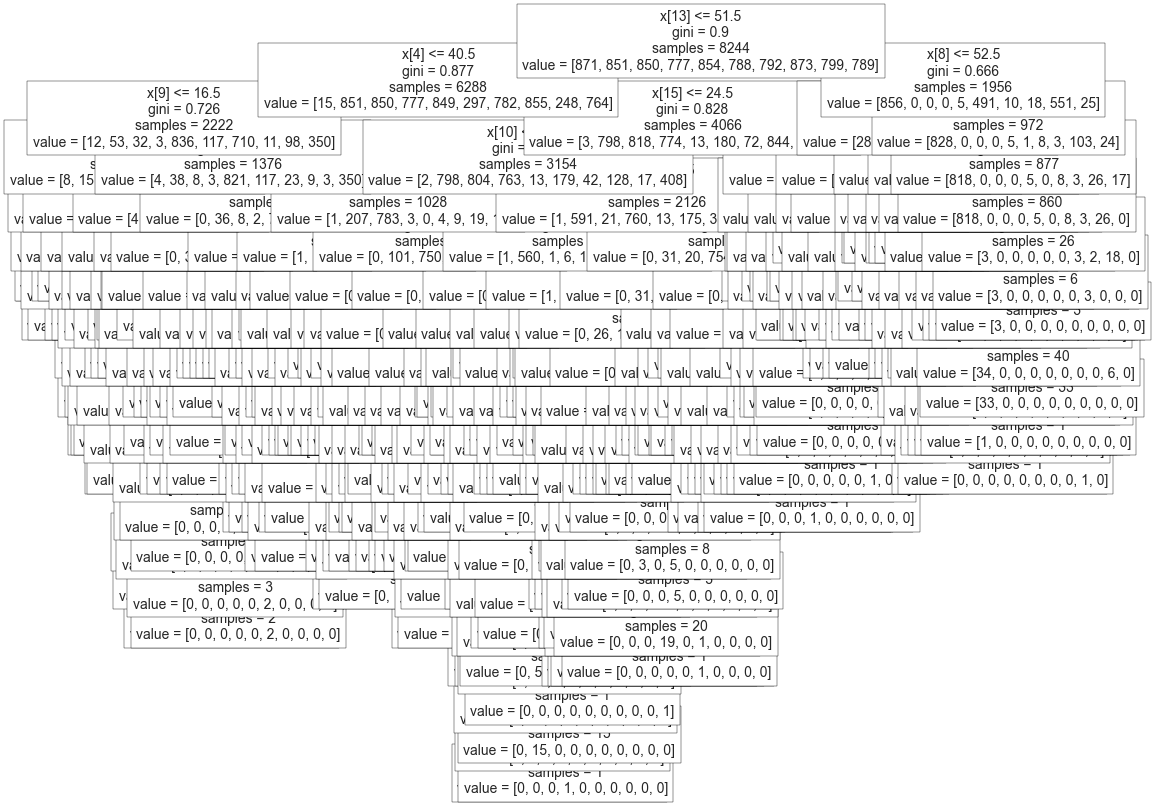

In [29]:
plt.figure(figsize=(12,10),dpi=100)
plot_tree(dt_model, fontsize=10);

### Fixing Overfit

In [91]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "sqrt", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [93]:
dt_model=DecisionTreeClassifier(random_state=101)
dt_grid=GridSearchCV(estimator=dt_model, 
                     param_grid=param_grid, 
                     scoring="f1_macro",
                     verbose=2,
                     n_jobs=-1)
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4410 candidates, totalling 22050 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitt

GridSearchCV(estimator=DecisionTreeClassifier(random_state=101), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_macro', verbose=2)

In [94]:
dt_grid.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [95]:
dt_grid.best_estimator_

DecisionTreeClassifier(min_samples_split=3, random_state=101, splitter='random')

In [96]:
dt_grid.best_score_

0.9575354530249454

In [97]:
dt_model=DecisionTreeClassifier(min_samples_split=3,splitter="random", random_state=101)


scores=cross_validate(dt_model, X_train, y_train, 
                      scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                      return_train_score=True,
                      cv=5,
                      n_jobs=-1)
pd.DataFrame(scores)

fit_time  score_time  test_accuracy  train_accuracy  test_precision_macro  \
0  0.007525    0.002974       0.967253        0.996816              0.967430   
1  0.007225    0.002885       0.959369        0.997422              0.959388   
2  0.007445    0.002909       0.957550        0.995906              0.957618   
3  0.007416    0.003440       0.949060        0.996967              0.949689   
4  0.006907    0.002999       0.955097        0.996513              0.955562   

   train_precision_macro  test_recall_macro  train_recall_macro  \
0               0.996908           0.967256            0.996783   
1               0.997506           0.958759            0.997388   
2               0.995983           0.957351            0.995847   
3               0.997025           0.948834            0.996919   
4               0.996560           0.954956            0.996480   

   test_f1_macro  train_f1_macro  
0       0.967310        0.996836  
1       0.958890        0.997442  
2       0.957438        0.995904  
3       0.949060        0.996966  
4       0.954979        0.996511

In [98]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_accuracy            0.957666
train_accuracy           0.996725
test_precision_macro     0.957937
train_precision_macro    0.996796
test_recall_macro        0.957431
train_recall_macro       0.996683
test_f1_macro            0.957535
train_f1_macro           0.996732
dtype: float64

In [108]:
dt_model=DecisionTreeClassifier(min_samples_split=3,splitter="random", random_state=101)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=3, random_state=101, splitter='random')

In [109]:
eval_metric(dt_model, X_train, y_train, X_test, y_test) 

Test_Set
[[268   0   1   0   0   0   1   0   2   0]
 [  0 272  13   4   1   0   0   2   0   0]
 [  0  12 276   2   1   0   0   3   0   0]
 [  0   4   0 270   0   2   0   1   0   1]
 [  1   1   0   0 283   0   3   1   0   1]
 [  0   1   0   3   1 254   1   0   1   6]
 [  1   4   0   0   0   0 253   3   3   0]
 [  0   9   0   2   4   1   0 245   5   3]
 [  3   0   0   0   0   1   0   0 252   0]
 [  0   4   0  15   7   7   0   5   1 227]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       272
           1       0.89      0.93      0.91       292
           2       0.95      0.94      0.95       294
           3       0.91      0.97      0.94       278
           4       0.95      0.98      0.96       290
           5       0.96      0.95      0.95       267
           6       0.98      0.96      0.97       264
           7       0.94      0.91      0.93       269
           8       0.95      0.98      0.97       256
           9       

In [82]:
ynew=[str(i)for i in y.unique()]
ynew

['8', '2', '1', '4', '6', '0', '5', '9', '7', '3']

In [79]:
newfeat=[str(i)for i in X.columns]
newfeat

['input1',
 'input2',
 'input3',
 'input4',
 'input5',
 'input6',
 'input7',
 'input8',
 'input9',
 'input10',
 'input11',
 'input12',
 'input13',
 'input14',
 'input15',
 'input16']

In [1]:
# plt.figure(figsize=(12,10),dpi=100)
# plot_tree(dt_model, filled=True, feature_names=newfeat, class_names= ynew, fontsize=7);

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


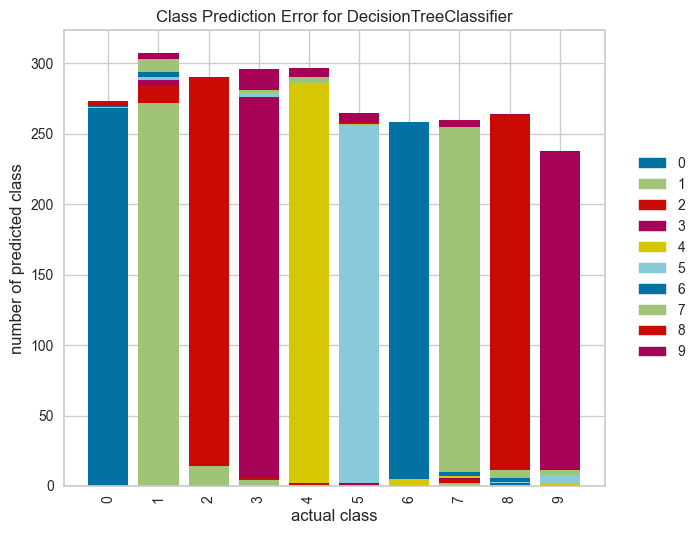

<Axes: title={'center': 'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [111]:
visualizer = ClassPredictionError(dt_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


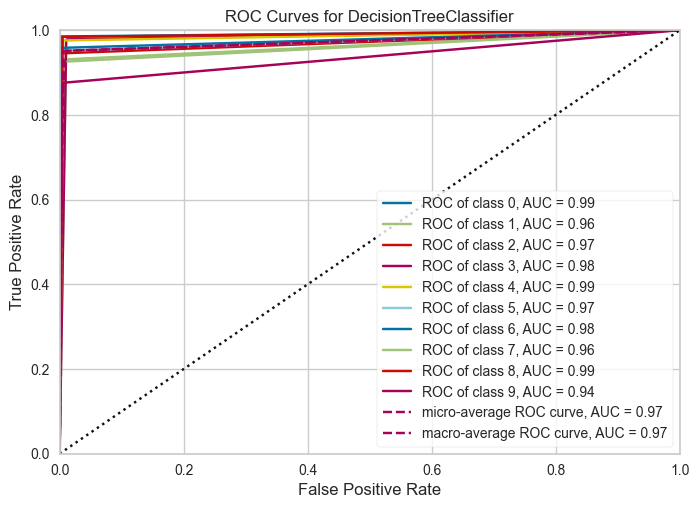

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [112]:
visualizer = ROCAUC(dt_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()   

### Decision Tree with Cleaned Data (outliers dropped)

In [116]:
X_cleaned=data_cleaned.drop("class", axis=1)
y_cleaned=data_cleaned["class"]

In [117]:
X_train, X_test, y_train, y_test= train_test_split (X_cleaned,y_cleaned,test_size=0.25, shuffle=False)

In [119]:
dt_model_cleaned=DecisionTreeClassifier()
dt_model_cleaned.fit(X_train,y_train)

DecisionTreeClassifier()

In [120]:
eval_metric(dt_model_cleaned, X_train, y_train, X_test, y_test) 

Test_Set
[[270   0   0   0   0   0   0   0   1   0]
 [  0 240  22   0   1   2   0   1   0   0]
 [  0  12 275   0   0   1   0   2   0   2]
 [  0   2   0 265   0   3   1   3   0   1]
 [  0   0   0   1 284   1   1   0   1   0]
 [  0   0   0   7   2 247   1   1   2   4]
 [  5   2   1   0   7   0 240   1   0   4]
 [  0   8   5   0   0   2   1 240   4   0]
 [  1   0   0   0   0   2   0   0 248   0]
 [  0   1   0   4   2   4   0   2   1 251]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       271
           1       0.91      0.90      0.90       266
           2       0.91      0.94      0.92       292
           3       0.96      0.96      0.96       275
           4       0.96      0.99      0.97       288
           5       0.94      0.94      0.94       264
           6       0.98      0.92      0.95       260
           7       0.96      0.92      0.94       260
           8       0.96      0.99      0.98       251
           9       

In [121]:
scores=cross_validate(dt_model_cleaned, X_train, y_train, 
                      scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                      return_train_score=True,
                      cv=5,
                      n_jobs=-1)
pd.DataFrame(scores)

fit_time  score_time  test_accuracy  train_accuracy  test_precision_macro  \
0  0.029231    0.003474       0.954799             1.0              0.954757   
1  0.029610    0.003310       0.962229             1.0              0.962180   
2  0.030362    0.003500       0.959133             1.0              0.958964   
3  0.029133    0.003260       0.961586             1.0              0.961691   
4  0.029503    0.003270       0.936803             1.0              0.936624   

   train_precision_macro  test_recall_macro  train_recall_macro  \
0                    1.0           0.954615                 1.0   
1                    1.0           0.961905                 1.0   
2                    1.0           0.958920                 1.0   
3                    1.0           0.961585                 1.0   
4                    1.0           0.936251                 1.0   

   test_f1_macro  train_f1_macro  
0       0.954659             1.0  
1       0.961856             1.0  
2       0.958896             1.0  
3       0.961487             1.0  
4       0.936233             1.0

In [122]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_accuracy            0.954910
train_accuracy           1.000000
test_precision_macro     0.954843
train_precision_macro    1.000000
test_recall_macro        0.954655
train_recall_macro       1.000000
test_f1_macro            0.954626
train_f1_macro           1.000000
dtype: float64

In [ ]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "sqrt", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [123]:
dt_model_cleaned=DecisionTreeClassifier(random_state=101)
dt_grid_cleaned=GridSearchCV(estimator=dt_model_cleaned, 
                     param_grid=param_grid, 
                     scoring="f1_macro",
                     verbose=2,
                     n_jobs=-1)
dt_grid_cleaned.fit(X_train, y_train)

Fitting 5 folds for each of 4410 candidates, totalling 22050 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, splitt

GridSearchCV(estimator=DecisionTreeClassifier(random_state=101), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_macro', verbose=2)

In [126]:
dt_grid_cleaned.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [127]:
dt_grid_cleaned.best_score_

0.9561813603770764

In [183]:
dt_model_cleaned=DecisionTreeClassifier(min_samples_split=3,splitter="best", random_state=101)


scores_cleaned=cross_validate(dt_model_cleaned, X_train, y_train, 
                      scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                      return_train_score=True,
                      cv=5,
                      n_jobs=-1)
pd.DataFrame(scores_cleaned)

fit_time  score_time  test_accuracy  train_accuracy  test_precision_macro  \
0  0.030088    0.003199       0.956656        0.998606              0.956389   
1  0.031558    0.003053       0.966563        0.997522              0.966808   
2  0.038006    0.004691       0.960372        0.996903              0.960583   
3  0.041228    0.003063       0.960347        0.998761              0.960577   
4  0.031459    0.004628       0.938042        0.997832              0.938157   

   train_precision_macro  test_recall_macro  train_recall_macro  \
0               0.998602           0.956381            0.998619   
1               0.997524           0.966211            0.997489   
2               0.996889           0.960224            0.996884   
3               0.998762           0.960415            0.998743   
4               0.997827           0.937842            0.997823   

   test_f1_macro  train_f1_macro  
0       0.956329        0.998609  
1       0.966339        0.997501  
2       0.960221        0.996878  
3       0.960285        0.998751  
4       0.937733        0.997820

In [184]:
scores_cleaned = pd.DataFrame(scores_cleaned, index=range(1,6))
scores_cleaned.iloc[:, 2:].mean()

test_accuracy            0.956396
train_accuracy           0.997925
test_precision_macro     0.956503
train_precision_macro    0.997921
test_recall_macro        0.956215
train_recall_macro       0.997912
test_f1_macro            0.956181
train_f1_macro           0.997912
dtype: float64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


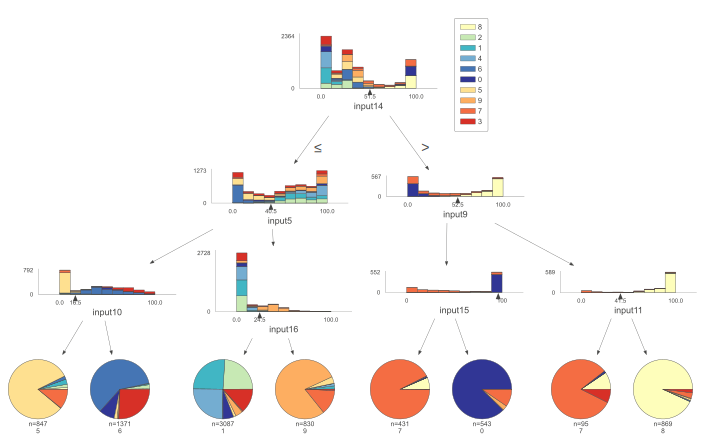

In [185]:
# Example of another visualizer

import dtreeviz
dt_model_cleaned=DecisionTreeClassifier(min_samples_split=3,splitter="best", random_state=101, max_depth=3)
dt_model_cleaned.fit(X_train, y_train)

viz_model = dtreeviz.model(dt_model_cleaned,
                           X_train=X_train, y_train=y_train,
                           feature_names=newfeat,
                           class_names=ynew)

v = viz_model.view()     # render as SVG into internal object 
viz_model.view()       # in notebook, displays inline

# 8. Conclusion

* Decision Tree model test results were slightly decreased with cleaned data. It seems that outliers does not have a significant effect on the model. 